<hr>

 *PART II: Data Analysis* 

<a id='eda'></a>
# Exploratory Data Analysis

In this phase we will be exploring the image dataset in depth words words
In the Exploratory Data Analysis (EDA) phase of this project, a key focus is to examine the dataset in depth for any potential biases that could mistakenly be interpreted as distinguishing features by the machine learning models later on. This includes the orientation of the leaves as well as the color composition of the backround which makes up the majority of the pixels in any given image.


**Objectives:**

- Explore the dataset  
- Analyze color composition  
-


### Import Libraries

In [2]:
## IMPORT LIBRARIES ##

import numpy as np #numpy for 

import pandas as pd # pandas

from matplotlib import pyplot as plt # matplot library
import seaborn as sns

In [3]:
## IMPORT LIBRARIES ##

import os  
from matplotlib import image as mpimg
from random import randint
from PIL import Image
from skimage import io, img_as_float, img_as_ubyte
from skimage.io import imread, imshow
import cv2
from glob import glob
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

##########

### Load the Dataset

In [4]:
## Load the image directories ##

dir = '/Users/raghadibrahim/Desktop/Olive-Tree-Disease-Detection/dataset' # paste your folder directory

# returns a list containing the names of the images in the `healthy` folder
training_healthy_data= os.listdir(dir + '/training/healthy') # training dataset
testing_healthy_data = os.listdir(dir + '/training/healthy') # testing dataset

# returns a list containing the names of the images in the `aculus olearius` folder
training_aculus_data= os.listdir(dir + '/training/aculus_olearius') # training dataset 
testing_aculus_data = os.listdir(dir + '/training/aculus_olearius') # testing dataset

# returns a list containing the names of the images in the `peacock spot` folder
training_peacock_data= os.listdir(dir + '/training/peacock_spot') # training dataset 
testing_peacock_data = os.listdir(dir + '/training/peacock_spot/') # testing dataset

#all_data = [healthy_data, aculus_olearius_data, peacock_disease_data]

### Setup Dictionaries

In [5]:
training_dir = {
    'Healthy Leaves': os.path.join(dir, 'training/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'training/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'training/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

testing_dir = {
    'Healthy Leaves': os.path.join(dir, 'testing/healthy'), # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': os.path.join(dir, 'testing/aculus_olearius'), # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Spot Leaves': os.path.join(dir, 'testing/peacock_spot') # Path to the directory containing images with Peacock Spot Leaves
}

training_data = {
    'Healthy Leaves': training_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': training_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': training_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}

testing_data = {
    'Healthy Leaves': testing_healthy_data, # Path to the directory containing the Healthy Leaves dataset
    'Aculus Olearius Leaves': testing_aculus_data, # Path to the directory containing images with Aculus Olearius Leaves
    'Peacock Disease Leaves': testing_peacock_data # Path to the directory containing images with Peacock Spot Leaves
}

##########

Now that the dataset has been successfully loaded from the corresponding directories, we can proceed with the preprocessing stage. 
<br><br>

---

<a id='4.1'></a>
## Orientation

(fix the words words) A notable concern is the orientation of the olive leaves within the images, which can be mistakenly extracted as a feature by the predictive models later on. To eliminate any potential bias that could impact the model's ability to generalize, it is imperative to ensure that the dataset displayed a sufficient variation in leaf orientation. 

To mitigate this risk, we must carefully inspect and ensure similar variation in the leaf orientation across the three classes. The method chosen to do this is by finding the slope of a leaf within an image, which involves a lengthy process summarized below: 

> **Steps to Compute the Variation in Leaf Orientation**
>
>> **STEP 1:**
>> Flatten an image
>> 
>> **STEP 2:** Apply KMeans to segment an image into two clusters: the leaf and the background
>> 
>> **STEP 3:** Crop the image down to show just the leaf
>> 
>> **STEP 4:** Find the slope
>> 
>> **STEP 5:** Plot a line with the found slope on the same plot as the image
>> 

First I will illustrate the process by doing it on a single image from the dataset and then I will apply the process on the entire dataset by iterating across the classes.

### On a sample

First, we will be using `mpimg.imread()` to read and display the image as well as its shape

In [6]:
img_ex = mpimg.imread(dir + '/training/peacock_spot/' + training_peacock_data[9]) # Read an image from the specified directory and file name

Let's display it before proceeding with the outlined process above:

(600, 800, 3)

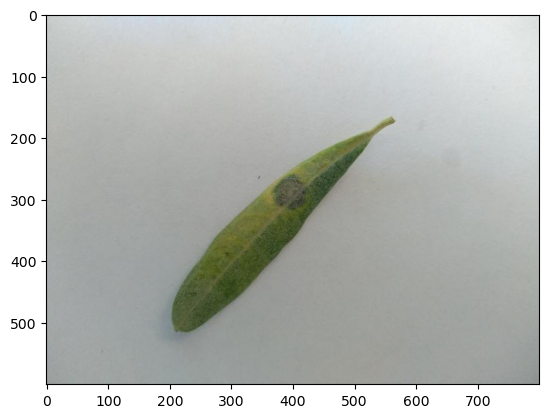

In [7]:
plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

**STEP 1: Flatten the image.**

Before running the K-Means mode, we must reshape the image from its current dimensions $600*800*3$ into a 2D array where each row represents a pixel and the colums represent the RGB channels. Since we have $600*800$ pixels, we expect to see $480000$ pixels as our row value and $3$ for our column value representing the three color channels.

In [8]:
## Reshape the image
flat_image = img_ex.reshape(-1, 3) # The '-1' automatically calculates number of pixels in the image

In [9]:
# SANITY CHECK
flat_image.shape

(480000, 3)

In [10]:
# SANITY CHECK
flat_image

array([[201, 205, 204],
       [200, 204, 203],
       [198, 202, 201],
       ...,
       [142, 147, 143],
       [142, 147, 141],
       [142, 147, 141]], dtype=uint8)

now we can run the KMeans model to segment the image.

**STEP 2: Segment the image into two clusters to identify each of the backround and the leaf respectively by running a K-Means Model.**

Now we can start the process of applying the K-Means clustering algorithm to an image for segmentation, aiming to differentiate between two primary features or segments within the image. This line trains the KMeans model using the RGB values of every pixel in the image. The model will then create two clusters to distinguish between the two primary colors/clusters in the image. 
For this we will be using the `KMeans` library from `sklearn.cluster` which we will import below:


In [11]:
## importing libraries ##

from sklearn.cluster import KMeans 

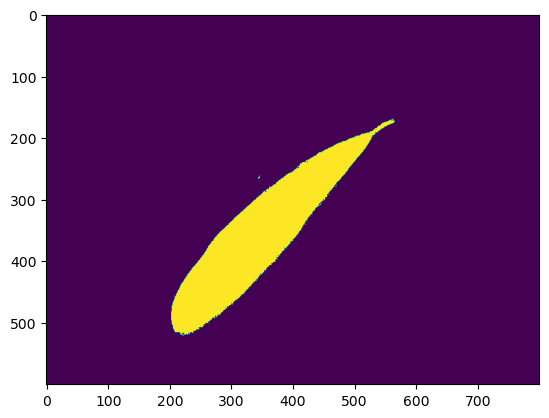

In [12]:
## Instantiate the K-MEANS Model ##

kmeans = KMeans(n_clusters=2, random_state=123) # 2 clusters to segment the image into leaf and background
kmeans.fit(flat_image) # Fit the K-Means model on the flattened image data
labels = kmeans.predict(flat_image) # Predict the labels for each pixel in the image
label_img = labels.reshape(600,800) # Reshape the labels back into the original image dimensions


## Ensure that the leaf is consistently labeled as 1 across runs

if labels.sum() > (1-labels).sum():
   labels = 1 - labels


## Display the image

plt.figure() # Create a new figure for plotting
plt.imshow(labels.reshape(600,800)) # Reshape the labels array to the original image dimensions (600x800)
plt.show() # Display the segmented image on a plot

####

**STEP 3: Crop the image down to the leaf's indices.**

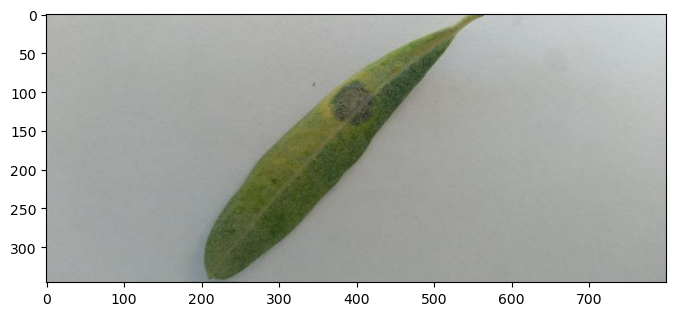

In [13]:
## STEP 4: Find the first and last row index where the sum of labels in the row is greater than 10
first_row_index = np.argmax(label_img.sum(axis=1) > 10)
last_row_index = 600 - np.argmax((label_img.sum(axis=1) > 10)[::-1])

## STEP 5: Creating a new figure with specified dimensions
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, :]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

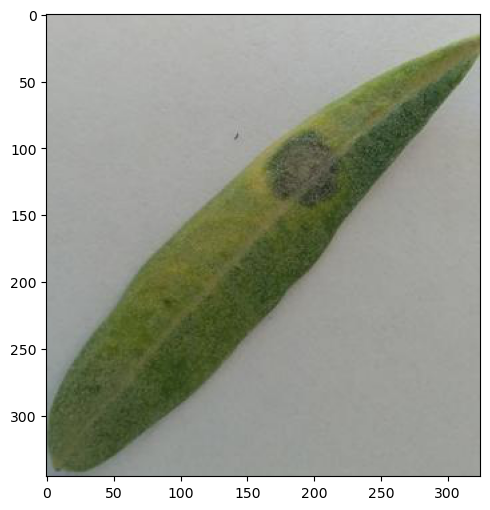

In [14]:
## STEP 6: Find the first and last column index where the sum of labels in the column is greater than 10
first_col_index = np.argmax(label_img.sum(axis=0) > 10)
last_col_index = 800 - np.argmax((label_img.sum(axis=0) > 10)[::-1])

## STEP 7: Creating a new figure for displaying the cropped image
plt.figure(figsize=(8,6))
plt.imshow(img_ex[first_row_index:last_row_index, first_col_index:last_col_index]) # Displaying the cropped image
plt.show() # Displaying the cropped image on a plot

now lets compute the slope.

**STEP 4: Compute slope**

In [15]:
## STEP 8: Compute the slope 

slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

slope

1.0646153846153845

**STEP 5: Plot a line with the found slope on the same plot as the image**

Now that we've managed to compute the slope of the leaf's orientation, we can use it to plot a line over the image to ensure that it does indeed match the leaf

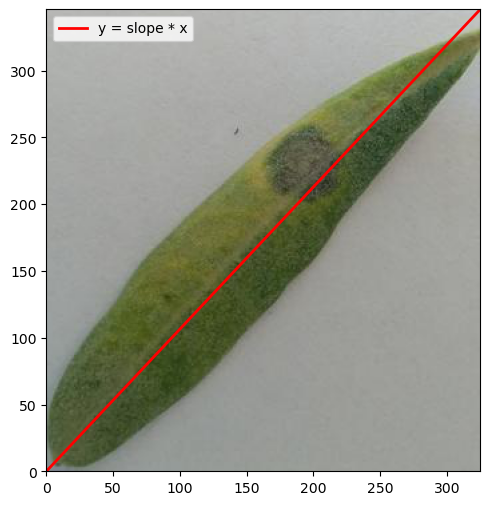

In [16]:
## STEP 9: Store the cropped image as a new variable
new_img = img_ex[first_row_index:last_row_index, first_col_index:last_col_index]

## STEP 10: Plot

plt.figure(figsize=(10, 6))  # Adjust figure size to maintain ratio

# Set extent to image's width and height to the new dimensions of the cropped image
plt.imshow(new_img, extent=[0, last_col_index - first_col_index, 0, last_row_index - first_row_index])  

# Generate (x,y)
x = np.arange(0, 801) # Generate x values within the width of the image
y = slope * x # Calculate y values based on the line formula
plt.plot(x, y, 'r-', linewidth=2, label='y = slope * x') # Overlay the line plot on the image

# Set the plot limits to exactly match the image dimensions
plt.xlim([0, last_col_index - first_col_index])
plt.ylim([0, last_row_index - first_row_index])  

plt.legend() # Add legend
plt.show() # Show the plot

We can now proceed with building a function that we can use to iterate through the images and find the associated slope or orientation of the leaf.

### On the dataset

First we need to find the slopes for all the images in every class. To do this, we will define a slope function `get_slope( )` that takes in an image and outputs the slope:

#### Defining a function

In [17]:
# Define the Function #
def get_slope(img):
    '''
    Takes in an RGB image array and returns the slope of the leaf's orientation in the image.
    
    Parameters:
    img (numpy.ndarray): The input image array in RGB format.
    
    Returns:
    float: The calculated slope of the leaf's orientation.
    '''
    
    # Flatten the image for KMeans
    flat_img = img.reshape(-1, 3)
    
    # Apply KMeans to segment the image
    kmeans = KMeans(n_clusters=2, random_state=123)
    kmeans.fit(flat_img)
    labels = kmeans.predict(flat_img)
    
    # Ensure the majority class is considered as the leaf
    if labels.sum() > (1-labels).sum():
        labels = 1 - labels

    # Reshape labels back to the original image shape
    label_img = labels.reshape(600,800)
    label_sum_row = label_img.sum(axis=1)
    label_sum_col = label_img.sum(axis=0)

    # Calculate first and last indices for rows and columns where the leaf is present
    first_row_index = np.argmax((label_sum_row) > 10)
    last_row_index = 600 - np.argmax(((label_sum_row) > 10)[::-1])
    first_col_index = np.argmax((label_sum_col) > 10)
    last_col_index = 800 - np.argmax(((label_sum_col) > 10)[::-1])

    # Calculate the slope
    slope = (last_row_index - first_row_index)/(last_col_index - first_col_index)

    return slope

Let's test it on a few images:

In [18]:
# SANITY CHECK #

get_slope(img_ex)

1.0646153846153845

#### Plot slope histograms

And now we can use this function to iterate over the images in the heathy directory and store all the slopes in a list that we can later plot in a histogram. NOTE THIS WILL TAKE OVER AN HOUR TO RUN. Wash the dishes in the meantime.

In [19]:
## Find slope of leaf's orientaton for healthy leaves ##

# empty list
healthy_slopes = [] 

# for loop to iterate through images in healthy directory
for i in training_healthy_data:

    total = len(training_healthy_data) # total number of images is the length of the list of file names
    current = training_healthy_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/healthy/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    healthy_slopes.append(slope) # store slopes in a list
    

In [20]:
## Find slope of leaf's orientaton for peacock spot infected leaves ##

# empty list
peacock_slopes = [] 

# for loop to iterate through images in peacock directory
for i in training_peacock_data:

    total = len(training_peacock_data) # total number of images is the length of the list of file names
    current = training_peacock_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/peacock_spot/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    peacock_slopes.append(slope) # store slopes in a list
    

In [26]:
## Find slope of leaf's orientaton for aculus olearius infected leaves ##

# empty list
aculus_olearius_slopes = [] 

# for loop to iterate through images in aculus_olearius directory
for i in training_aculus_data:

    total = len(training_aculus_data) # total number of images is the length of the list of file names
    current = training_aculus_data.index(i) # the index of the current image the loop is on

    # progress bar 
    print("On image ", current, ' from ', total, ' images.', end="\r", flush= True)

    # reading the image 
    try:
        image = mpimg.imread(dir + '/training/aculus_olearius/' + i)
    except:
        continue

    
    slope = get_slope(image) # use the `get_slope` function to find teh slope
    aculus_olearius_slopes.append(slope) # store slopes in a list
    

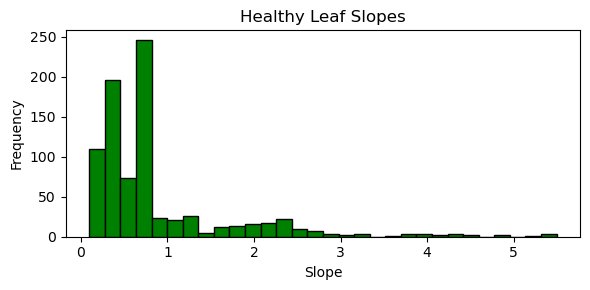

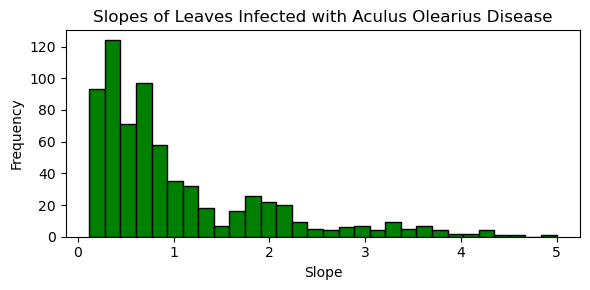

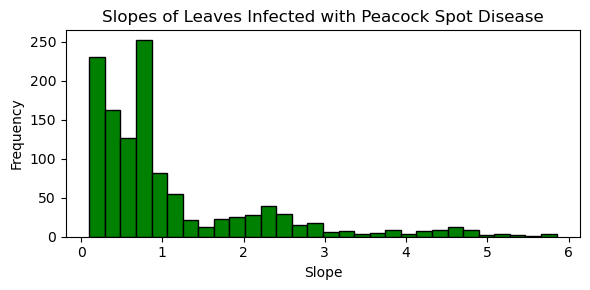

In [27]:
# Dictionary to hold the slope data and corresponding titles
slope_data = {
    'Healthy Leaf Slopes': healthy_slopes,
    'Slopes of Leaves Infected with Aculus Olearius Disease': aculus_olearius_slopes,
    'Slopes of Leaves Infected with Peacock Spot Disease': peacock_slopes
}

# Iterate over the dictionary to generate histograms for each set of slopes
for title, slopes in slope_data.items():
    plt.figure(figsize=(6, 3))  # Set the figure size
    plt.hist(slopes, bins=30, color='green', edgecolor='black')  # Generate the histogram
    plt.title(title)  # Set the title for each histogram
    plt.xlabel('Slope')  # Label for the x-axis
    plt.ylabel('Frequency')  # Label for the y-axis
    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the plot

#### Observations:

- The slopes of the leaves' orientations across the classes seem to display similar variance which means our predictive model will less likely extract it as a feature.

--- 

<a id='4.2'></a>
## Color Distribution Analysis

In this section I will analyze the distribution of the three color channels (Red, Green and Blue) for each image and examine the statistical analysis to further understand the dataset. I will also calculate the mean and standard deviation for each RGB channel across all images within each class. This can highlight differences in color distributions that might be characteristic of each class. First I will run it on a single image to illustrate the process and then on the entire dataset.


### On a sample

First, I will analyze the color distribution of a single image as seen below:

(600, 800, 3)

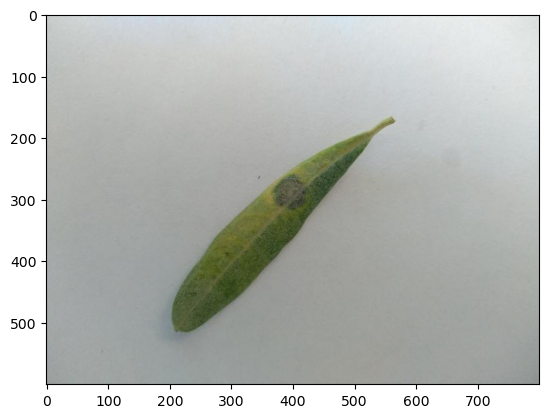

In [25]:

img_ex = mpimg.imread(dir + '/training/peacock_spot/' + training_peacock_data[9]) # Read an image from the specified directory and file name

plt.figure() # Create a new figure for displaying the image
plt.imshow(img_ex) # Display the image on a plot
display(img_ex.shape) # Display dimensions of the image (height, width, channels)
 

words words

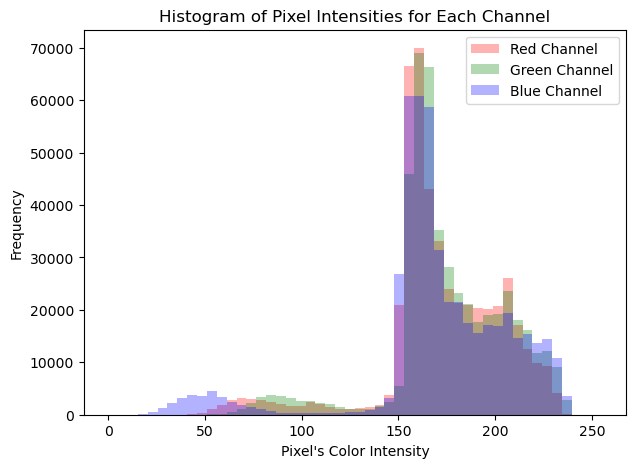

In [29]:
# STEP 1: Initiate some commands

channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels
rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel

plt.figure(figsize=(7, 5))  # Set figure size 


# STEP 2: 

# Loop through each channel
for i in range(3):
    # Extract the current channel's pixel intensities
    channel_data = img_ex[:, :, i].ravel()
    # Generate histogram for the current channel
    plt.hist(channel_data, bins=np.linspace(0, 255, 51), color=rgb_channels[i], alpha=0.3, label=channel_titles[i])


# STEP 3: Adding labels and title to the plot

plt.xlabel("Pixel's Color Intensity") # x-label
plt.ylabel("Frequency") # y-label
plt.title("Histogram of Pixel Intensities for Each Channel") # Setting title 

plt.legend() # Add a legend for the different color channels

plt.show() # Display the combined plot


This plot displays three histograms color coded for their respective channels, with the x-axis representing the pixel's color intensity (0-255) and the y-axis represents the frequency. To make the most out of this process, we must apply it on the entire dataset to examine the variance across the differents classes.

### On the dataset

To analyze the color distribution of the entire dataset, I will repeat the above process in a for-loop that iterates through the three classes. I will also perform some statistical analysis to further understand the dataset. 

In [22]:
# SANITY CHECK

training_dir

{'Healthy Leaves': 'dataset/training/healthy',
 'Aculus Olearius Leaves': 'dataset/training/aculus_olearius',
 'Peacock Spot Leaves': 'dataset/training/peacock_spot'}


Processing Healthy Leaves... Total images: 832
Could not load image .DS_Store: cannot identify image file 'dataset/training/healthy/.DS_Store'
Could not load image training_healthy.txt: cannot identify image file 'dataset/training/healthy/training_healthy.txt'
Processing image 832/832 in Healthy Leaves.
Finished processing images in Healthy Leaves


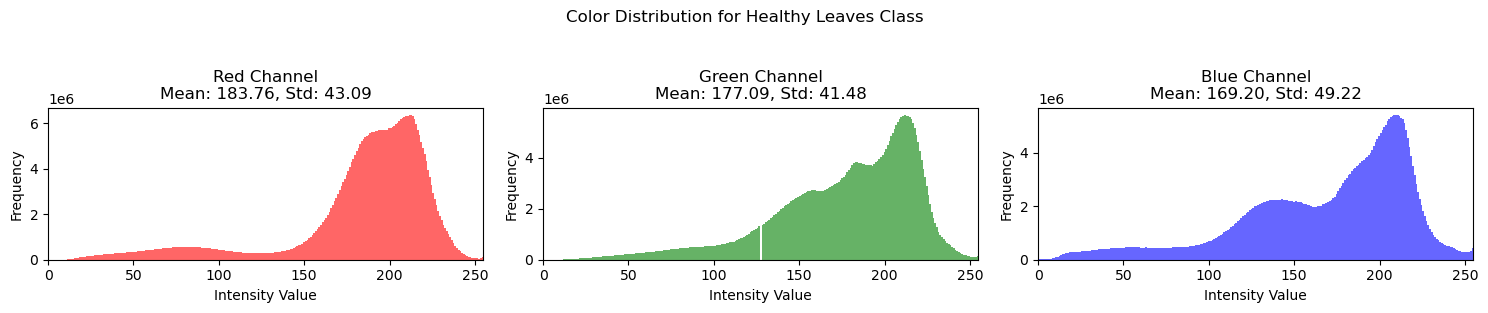


Processing Aculus Olearius Leaves... Total images: 692
Could not load image .DS_Store: cannot identify image file 'dataset/training/aculus_olearius/.DS_Store'
Could not load image training_aculus_olearius.txt: cannot identify image file 'dataset/training/aculus_olearius/training_aculus_olearius.txt'
Processing image 692/692 in Aculus Olearius Leaves.
Finished processing images in Aculus Olearius Leaves


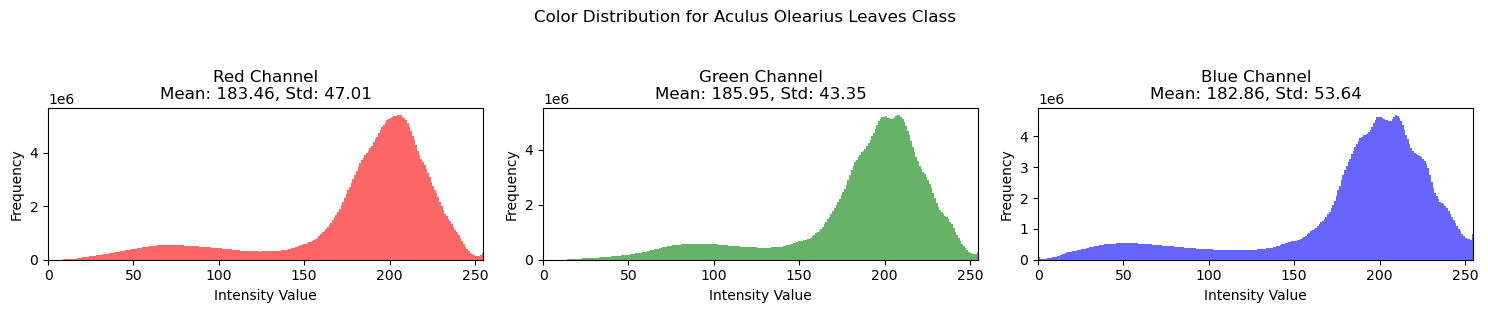


Processing Peacock Spot Leaves... Total images: 1202
Could not load image .DS_Store: cannot identify image file 'dataset/training/peacock_spot/.DS_Store'
Could not load image training_peacock_spot.txt: cannot identify image file 'dataset/training/peacock_spot/training_peacock_spot.txt'
Processing image 1202/1202 in Peacock Spot Leaves.
Finished processing images in Peacock Spot Leaves


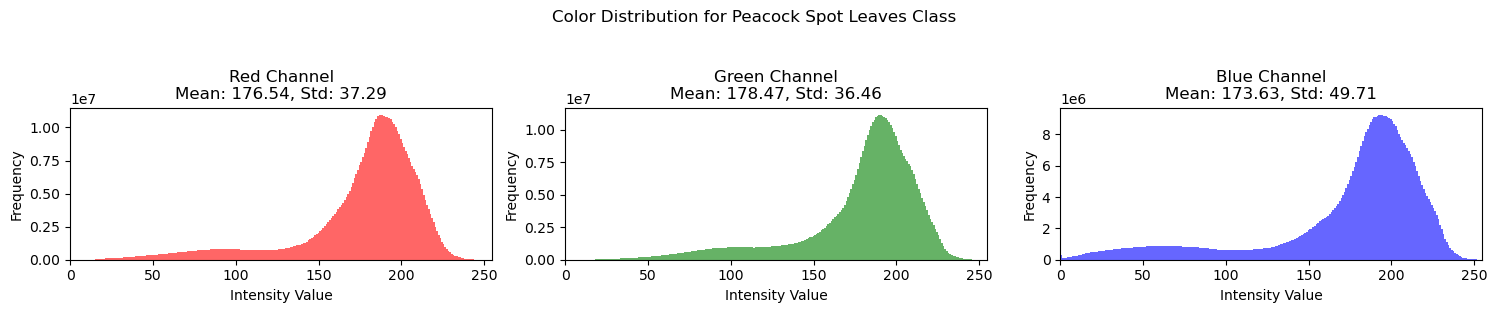

In [23]:
## STEP 1:

rgb_channels = ['red', 'green', 'blue'] # Colors for the histograms corresponding to each channel
channel_titles = ['Red Channel', 'Green Channel', 'Blue Channel'] # Titles for the channels for clarity in plotting


## STEP 2: 

for class_name, directory in training_dir.items():
    # Initialize a list to store all channel values for the current class
    all_channel_values = [[], [], []]  # List of lists for red, green, blue channels
    
    # Get a list of all image files in the directory
    image_files = os.listdir(directory)
    total = len(image_files)  # Total number of images
    
    print(f"\nProcessing {class_name}... Total images: {total}")

    # Iterate over each image file in the directory
    for current, img_file in enumerate(image_files, 1): 
        img_path = os.path.join(directory, img_file)
       
        try:
            img = mpimg.imread(img_path)  # Load the image
        except Exception as e:
            print(f"Could not load image {img_file}: {e}")
            continue
        
        # Accumulate channel values
        for i in range(3):  # Loop through each RGB channel
            all_channel_values[i].extend(img[:, :, i].ravel())
        
        # A progress bar 
        print(f"Processing image {current}/{total} in {class_name}.", end="\r", flush=True)

    # Clear the progress line
    print("\nFinished processing images in " + class_name)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Color Distribution for {class_name} Class')

    for i, color in enumerate(rgb_channels):
        channel_values_flat = np.array(all_channel_values[i])  # Convert to numpy array for analysis
        
        # Calculate statistics
        mean_val = np.mean(channel_values_flat)
        std_val = np.std(channel_values_flat)
        
        plt.subplot(2, 3, i+1)
        plt.hist(channel_values_flat, bins=256, color=color, alpha=0.6)
        plt.title(f'{channel_titles[i]}\nMean: {mean_val:.2f}, Std: {std_val:.2f}')
        plt.xlabel('Intensity Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 255])

    
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

<a id='4.2.1'></a>
#### Observations:
- The means and standard deviation are largely consistent across the first two classes however for the third class, we see that the standard deviation is significantly lower than the first two class whereas the mean and median seem to be largely consistent. This could be due to the image imbalance mentioned in the preprocessing stage above since the third class has significantly more images.
- We also see that the frequency of the pixels for the third class is also much higher than the first two classes which is also due to the data imbalance.